# Title of Project: Exploratory Data Analysis on Instacart Data
### Introduction of the project: 
In this project, we are conducting an exploratory analysis of instacart data. Instacart is a grocery delivery platform where customers can place a grocery order and have it delivered to them.
Our aim is to clean up the data and prepare a report that gives insights into the shopping habits of instacart customers like identifying popoular products, peak shopping time, peak shopping days etc.
##Stages of the Project:
This project consists of three stages
-Open and the read the data files and identify the contents in each file
-Preprocess the data by doing identify and fill missing values, remove duplicate values etc
-Analyze the data using different visualization methods and find the pattern of shopping habits
 

# Stage 1:Data Loading and Initial Identification
## Load the data files from the datasets  like instacart_orders, products, departments, aisles, order-products and identify the contents in each table.

#Import pandas and important libraries to analyze data. # Stage 1:Data Loading and Initial Identification


In [1]:
# Import pandas and matplotlib for reading and analyzing data
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

#Read the first dataset instacart orders and understand the contents in each column and store the dataframe in a variable instacart_orders. 

In [2]:
#Read the dataframe and identify the contents
instacart_orders =pd.read_csv('/datasets/instacart_orders.csv',sep=';')
display(instacart_orders.head())
instacart_orders.info()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


#Instacart orders consists of 478967 rows and 6 columns. Each row corresponds to one order on the instacart app and each column represents
- order_id:ID number that uniquely identifies each order
- user_id:ID number that uniquely identifies each customer account
- order_number:the number of times this customer placed an order
- order dow: day of the week that order is placed.(Assume 0 is for Sunday and 6 for saturday)
- order_hour_of_day : hour of the day that the order is was placed
- days_since_prior_order:number of days since this customer placed their previous orders
From the table it is clear that the datatype except for days_since_prior_order is int64.

#Read the second dataset products and understand the contents in each column and store the dataframe in a variable products. 

In [3]:
#Read the products dataframe and identify the contents
products=pd.read_csv('/datasets/products.csv', sep=';')
display(products.head())
products.info()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


#Products datasets consists of 49694 entries and 4 columns. each row corresponds to a unique product that customers can buy and  each column consists of
-product_id :ID number that uniquely identifies each product
-product_name : name of the product
-aisle_id: ID number that uniquely identifies each grocery aisle category
-department_id : ID number that uniquely identifies each grocery department category.
from the above description, it is clear that some product names are missing.
    

#Read the third dataset order products and understand the contents in each column and store the dataframe in a variable order_products. 

In [4]:
#Read the order_products dataframe and identify the contents
order_products=pd.read_csv('/datasets/order_products.csv', sep=';')
display(order_products.head())
order_products.info(show_counts=True)

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


#Order products datasets consists of 4545007 entries and 4 columns. Each row corresponds to one item placed in an order and each column consists of;
-order_id :ID number that uniquely identifies each order
-product_id :ID number that uniquely identifies each product
-add_to_cart_order:the sequential order in which  each item was placed in the cart
-reordered : 0 if the customer has never ordered this product before, 1 if they have.

#Read the fourth dataset aisles and understand the contents in each column and store the dataframe in a variable aisles.

In [5]:
#Read the aisles dataframe and identify the contents
aisles=pd.read_csv('/datasets/aisles.csv', sep=';')
display(aisles.head())
aisles.info()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


#Aisles dataframe consists of 134 entries and two columns aisle_id and aisle.
-aisle_id :ID number that uniquely identifies each grocery aisle category
-aisle :name of the aisle

#Read the fifth dataset departments and understand the contents in each column and store the dataframe in a variable departments.

In [6]:
#Read the departments dataframe and identify the contents
departments=pd.read_csv('/datasets/departments.csv', sep=';')
display(departments.head())
departments.info()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


#Department dataframe consists of 21 entries and two columns.
-department_id:ID number that uniquely identifies each grocery department category
-department :name of the department

#Conclusion : In this step, we import the libraries and read the datasets from different files. Also understand the contents in each datasets and found that some of the datas are missing and some have duplicate values. So we want to preprocess the data before we analyze the data.

## Find and remove duplicate values (and describe why you make your choices)

### `orders` data frame

#Stage 2:Preprocess the data before analyze
In this stage the contents in each datasets are checked and found that is there any missing and duplicate values. If there is any missing values fill it with appropriate steps and remove the duplicate values. Also verify the datatypes such as the ID columns are integers.

In [7]:
# Check for duplicated orders
instacart_orders_duplicates=instacart_orders.duplicated().sum()
print(instacart_orders_duplicates)

15


# The result true shows that the instacart_orders datasets consists of duplicate rows

# For orders placed on Wednesday 2.00AM, check for order_dow equal to 3 and order_hour_of-day is 2. We assume that order_dow=0 is Sunday.

In [8]:
# Check for all orders placed Wednesday at 2:00 AM
instacart_orders_wed2=instacart_orders[(instacart_orders['order_dow']==3) & (instacart_orders['order_hour_of_day']==2)]
print(instacart_orders_wed2)

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838     2766110   162084            41          3                  2   
5156     2190225   138285            18          3                  2   
15506     553049    58599            13          3                  2   
18420     382357   120200            19          3                  2   
24691     690242    77357             2          3                  2   
...          ...      ...           ...        ...                ...   
457013   3384021    14881             6          3                  2   
458816    910166   164782            18          3                  2   
459635   1680532   106435             6          3                  2   
468324    222962    54979            59          3                  2   
477526   2592344    46860            38          3                  2   

        days_since_prior_order  
4838                      16.0  
5156                      11.0  
15506                   

#From the above table, it is clear that about 121 orders are placed on Wednesday 2.00AM

In [9]:
# Remove duplicate orders
orders=instacart_orders.drop_duplicates()
orders.shape

(478952, 6)

#From the above result 478952 rows shows that about 15rows are duplicates in instacart orders dataframe.

In [10]:
# Double check for duplicate rows
print(orders.duplicated().sum())

0


In [11]:
# Double check for duplicate order IDs only
print(orders['order_id'].duplicated().sum())

0


The above two results shows the output as zero which means there is no duplicate orders in instacart orders dataframe. The duplicate rows are removed.

### `products` data frame

In [12]:
# Check for fully duplicate rows
products_duplicated=products.duplicated().any()
products_duplicated

False

In [13]:
# Check for just duplicate product IDs
print(products['product_id'].duplicated().sum())

0


#From the above two results, it is clear that there is no rows are duplicated.

In [14]:
# Check for just duplicate product names (convert names to lowercase to compare better)
products['product_name'] =products['product_name'].str.lower()
print(products['product_name'].duplicated().sum())

1361


Here we check the product name for that we convert all cases to lowercase for better results and found duplicated product names count.

In [15]:
# Check for duplicate product names that aren't missing
duplicate_products=products[~(products['product_name'].isna())&(products['product_name'].str.lower().duplicated())]
print(duplicate_products.head(10))

       product_id                      product_name  aisle_id  department_id
2058         2059                   biotin 1000 mcg        47             11
5455         5456  green tea with ginseng and honey        96             20
5558         5559            cream of mushroom soup        69             15
7558         7559         cinnamon rolls with icing       105             13
9037         9038            american cheese slices        21             16
10410       10411                  cauliflower head        83              4
12820       12821                     pumpkin spice        53             16
14961       14962                    hearts of palm        81             15
15659       15660                   cream of tartar       104             13
16484       16485           lasagna with meat sauce        38              1


### `departments` data frame

#Check for departments dataframe that any duplicate rows.

In [16]:
#Check for duplicate rows
departments_duplicates=departments.duplicated().any()
print(departments_duplicates)

False


In [17]:
#Double check for duplicate rows
print(departments.duplicated().sum())

0


The above two output shows, False and zero there is no duplicated rows in the dataframe.

### `aisles` data frame

#Check for aisles dataframe that any duplicate rows.

In [18]:
##Check for duplicate rows
aisles_duplicates=aisles.duplicated().any()
print(aisles_duplicates)

False


In [19]:
#Double check for duplicate rows
print(aisles.duplicated().sum())

0


The above two output shows, False and zero there is no duplicated rows in the dataframe.

### `order_products` data frame

#Check for order_products dataframe that any duplicate rows.

In [20]:
# Check for fullly duplicate rows
print(order_products.duplicated().sum())

0


In [21]:
# Double check for any other tricky duplicates
order_products_duplicates=order_products.duplicated().any()
print(order_products_duplicates)

False


 #The above two output shows, False and zero there is no duplicated rows in the dataframe.

## Find and remove missing values


### `products` data frame

In [22]:
#Counts the missing values in product dataframe
print(products.isna().sum())

product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64


#The isna().sum() counts the missing values in products dataframe and found that 1258 product names are missing.

In [23]:
# Are all of the missing product names associated with aisle ID 100?
#Filter the DataFrame which the productname are missing
missing_product_name=products[products['product_name'].isnull()]
aisle_id=missing_product_name['aisle_id'].unique()
print(f"Aisle_id associated with missed product name:{aisle_id}")

Aisle_id associated with missed product name:[100]


#The above result shows all of the missing product names are associated with aisle id 100.

In [24]:
# Are all of the missing product names associated with department ID 21?
department_id=missing_product_name['department_id'].unique()
print(f'The missing product name associated with department:{department_id}')

The missing product name associated with department:[21]


#The above result shows all of the missing product names are associated with department id 21.

In [25]:
# What is this ailse and department?
aisle_name =aisles.loc[aisles['aisle_id']==100, 'aisle'].values[0]
print("Aisle Name:", aisle_name)
department_name=departments.loc[departments['department_id']==21,'department'].values[0]
print("Department name:", department_name)

Aisle Name: missing
Department name: missing


#The above result shows there is no aisle and department corresponds to aisle 1d 100 and department id 21.

In [26]:
# Fill missing product names with 'Unknown'
products['product_name']=products['product_name'].fillna('Unknown')

### `orders` data frame

In [27]:
#Counts the missing values in orders dataframe
print(orders.isna().sum())

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64


In [28]:
# Are there any missing values where it's not a customer's first order?
not_first_order=orders[orders['order_number']> 1]
print(not_first_order.isnull().sum())

order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64


#The result shows all the missing values in the column days_since_prior_order is first order.


### `order_products` data frame

In [29]:
#Counts the missing values in orders dataframe
print(order_products.isna().sum())
order_products.info()

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


In [30]:
# What are the min and max values in this column?
min_value = order_products['add_to_cart_order'].min()
max_value = order_products['add_to_cart_order'].max()
print(f"The minimum value in add_to_cart_order column is {min_value} and the maximum value is  {max_value}")

The minimum value in add_to_cart_order column is 1.0 and the maximum value is  64.0


In [31]:
# Save all order IDs with at least one missing value in 'add_to_cart_order'
missing_value_IDS=order_products[order_products['add_to_cart_order'].isna()]['order_id'].unique()
print(missing_value_IDS)

[2449164 1968313 2926893 1717990 1959075  844733   61355  936852  264710
 1564093  129627  293169 2849370 1386261 3308010  903110 2136777 3347453
 1888628  165801 2094761 1038146 2997021  813364 2256933  171934 2409109
 1730767 1169835  733526  404157 3125735  747668 1800005 1961723  871281
  388234 1648217 1477139  102236 1021563 1832957 2721963  678116 1220886
 1673227 2999801 1633337 2470674 2625444 1677118 2479011 3383594 1183255
 1713430 2652650 1598369 1916118  854647 1302315  888470  180546 2621907
 1308785 2729254    9310 2170451 2979697 1625713 1529171]


In [32]:
# Do all orders with missing values have more than 64 products?
#Filter the dataframe 
filtered_order=order_products[order_products['order_id'].isin(missing_value_IDS)]
#Groupby order_id and count each id
order_counts=filtered_order.groupby('order_id')['product_id'].count()
#Check the condition
order_more_than64=order_counts[order_counts>64]
#Print the results
print(f"The number of orders more than 64 products is {order_more_than64.count()}")
display(order_more_than64)

The number of orders more than 64 products is 70


order_id
9310        65
61355      127
102236      95
129627      69
165801      70
          ... 
2999801     70
3125735     86
3308010    115
3347453     71
3383594     69
Name: product_id, Length: 70, dtype: int64

In [33]:
# Replace missing values with 999 and convert column to integer type
order_products['add_to_cart_order']=order_products['add_to_cart_order'].fillna(999).astype(int)
print(order_products.isna().sum())

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64


#Conclusion: The dataframes are preprocessed for the analysis purpose and remove all the duplicate rows from each dataframe. Also identify the missing values in each dataframe.


#Stage 3:Exploratory Data Analysis.
In this stage we are going to analyse the diffrerent shopping habits and behavior of shopping patterns for different instacart customers.

### [A1] Verify that the `'order_hour_of_day'` and `'order_dow'` values in the `orders` tables are sensible (i.e. `'order_hour_of_day'` ranges from 0 to 23 and `'order_dow'` ranges from 0 to 6)

In [34]:
#Check whether order_hour_of_day ranges from 0 to 23.
print(instacart_orders['order_hour_of_day'].sort_values().unique())

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


In [35]:
#Check whether order_dow ranges from 0 to 6.
print(instacart_orders['order_dow'].sort_values().unique())

[0 1 2 3 4 5 6]


#The above two results verifies that the values in order dow and order hour of day columns are sensible.

### [A2] What time of day do people shop for groceries?

#Our aim is to find the peak time of the day for shopping groceries. To calculate the pattern we can use bar chart which describes the order hour of day.

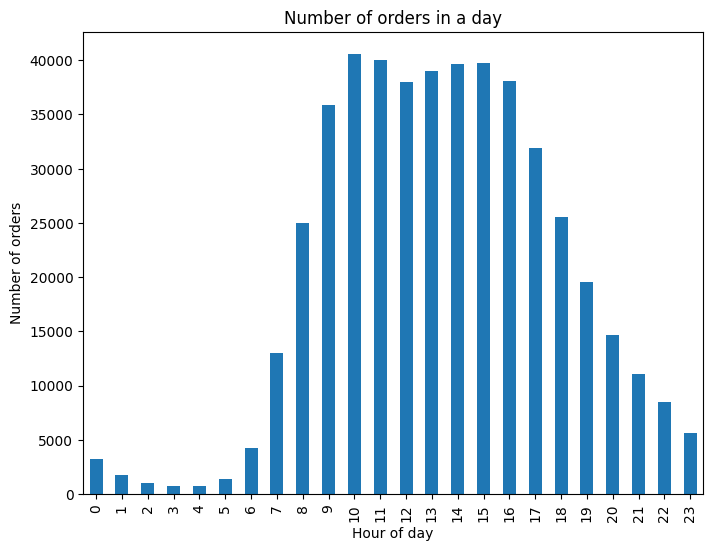

In [36]:
#Plot the pattern of shopping time of a day
instacart_orders['order_hour_of_day'].value_counts().sort_index().plot(x='order_hour_of_day',
                                                                        y='order_number',
                                                                        kind='bar',
                                                                        title='Number of orders in a day',
                                                                        xlabel='Hour of day',
                                                                        ylabel='Number of orders',
                                                                        figsize=[8,6]
                                                                        )
plt.show()

#Analysis of orders in a day
From the above plot, we can see that the number of orders increasing from morning and reaches peak during lunchtime and after that decreases the value. So the peak time for shopping in day is from 10.00am to 4.00pm.

### [A3] What day of the week do people shop for groceries?

#Our aim is to find the peak time of the week for shopping groceries. To calculate the pattern we can use bar chart which describes the order dow.

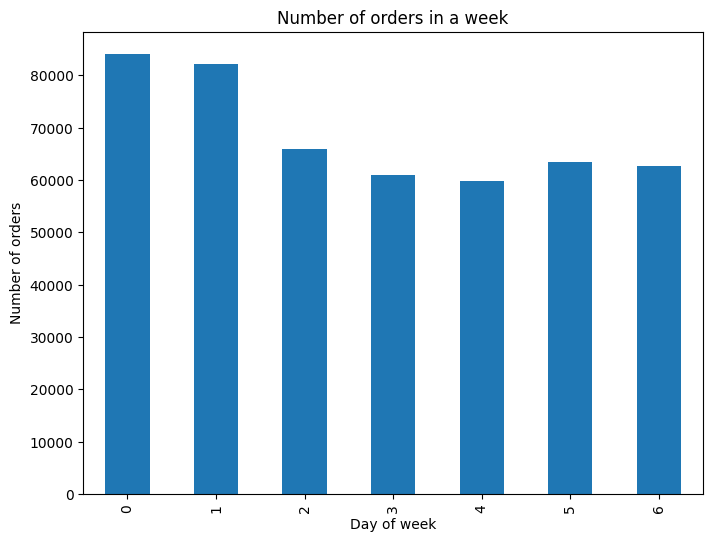

In [37]:
#Plot the patten of shopping in a week
instacart_orders['order_dow'].value_counts().sort_index().plot(x='order_dow',
                                                                        y='order_number',
                                                                        kind='bar',
                                                                        title='Number of orders in a week',
                                                                        xlabel='Day of week',
                                                                        ylabel='Number of orders',
                                                                        figsize=[8,6]
                                                                        )
plt.show()

#Analysis of the orders in a week
For this analysis we use number of orders in each day of the week. The result shows the customers use their weekends for shopping.

### [A4] How long do people wait until placing another order?

#Our aim is to find the waiting period for next order . 

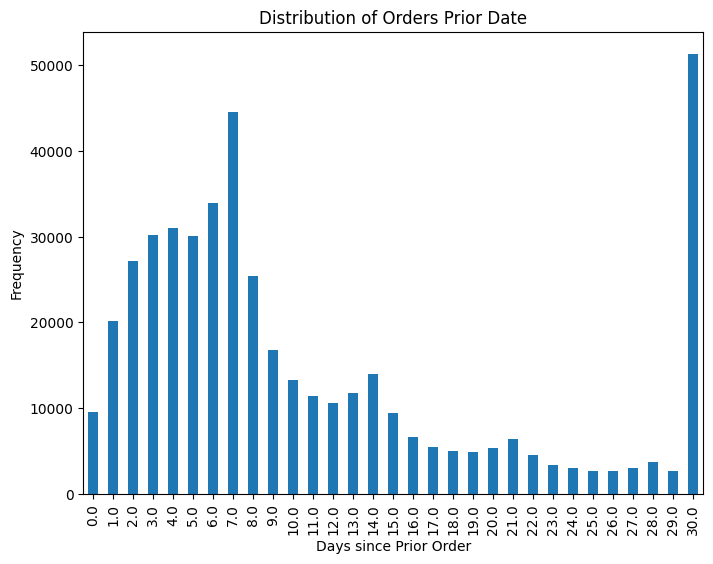

In [38]:
#Plot the pattern of waiting period for next order
instacart_orders['days_since_prior_order'].value_counts().sort_index().plot(
                                                                        kind='bar',
                                                                        title='Distribution of Orders Prior Date',
                                                                        xlabel='Days since Prior Order',
                                                                        ylabel='Frequency',
                                                                        figsize=[8,6]
                                                                        )
plt.show()

In [39]:
#Calculate the maximum and minimum waiting period for next order
max_value=instacart_orders['days_since_prior_order'].max().astype('int')
min_value=instacart_orders['days_since_prior_order'].min().astype('int')
print(f'The maximum days for next order is { max_value} and minimum waiting period for next order is {min_value}')

The maximum days for next order is 30 and minimum waiting period for next order is 0


#Analysis for waiting period
From the above graph it is clear that most of the customers purchase is weekly or monthly basis. Therefore the maximum number of days for next order is 7 or 30.

# [B] Medium (must complete all to pass)

### [B1] Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays? Plot the histograms for both days and describe the differences that you see.

In [40]:
#Check for wednesday and saturday order
wednesday_order=instacart_orders[instacart_orders['order_dow']==3]
saturday_order=instacart_orders[instacart_orders['order_dow']==6]

In [41]:
#Dataframe for wednesday and saturday order
df=pd.DataFrame({'Wednesday':wednesday_order['order_hour_of_day'],
                'Saturday':saturday_order['order_hour_of_day']
                })

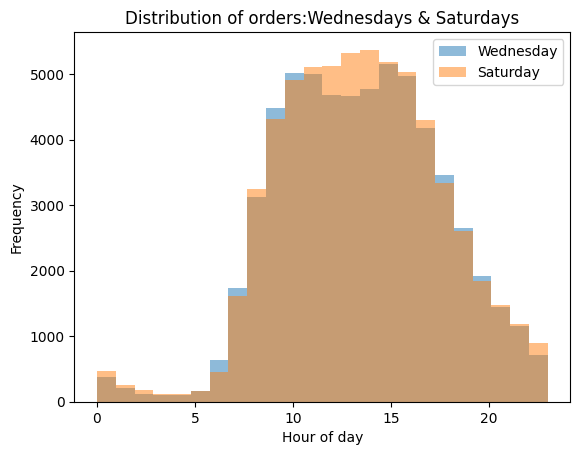

In [42]:
#Plot the histogram
df.plot.hist(bins=24,alpha=0.5)
plt.xlabel('Hour of day')
plt.ylabel('Frequency')
plt.title('Distribution of orders:Wednesdays & Saturdays')
plt.legend(['Wednesday','Saturday'])
plt.show()

#Analysis for distribution of orders:
From the above plot compared to wednesday people chooses saturday for shopping. The peak time for shopping for both the days is from 10.00am to 4.00pm.

### [B2] What's the distribution for the number of orders per customer?

#To find the distribution of number of orders per customer group the orders by user-id and count the number of order id.

In [43]:
#Check for number of orders per customer
order_counts=instacart_orders.groupby('user_id')['order_id'].count().sort_values()

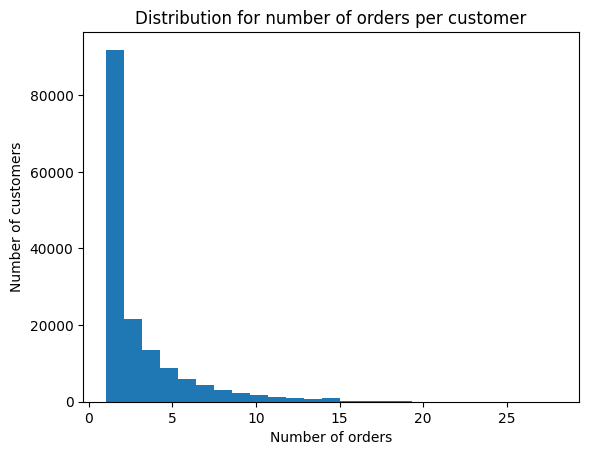

In [44]:
#Plot the histogram 
plt.hist(order_counts, bins=25)
plt.xlabel('Number of orders')
plt.ylabel('Number of customers')                
plt.title('Distribution for number of orders per customer')
plt.show()

#From the above figure it is clear that most of the customers uses one to three times. The number of customers which uses the order more than 10times is very less.

### [B3] What are the top 20 popular products (display their id and name)?

#Our aim is to find the top 20 popular products. For this we can use product id and count how many times that product is ordered.


In [45]:
#Merge the products and order_products dataframe
order_merge=order_products.merge(products,on='product_id')
#Count the top popular products
product_counts=order_merge.groupby(['product_id','product_name']).size()

In [46]:
#Sort the top products
top_products=product_counts.sort_values(ascending=False)

In [47]:
#Print top 20 products
print(top_products.head(20))

product_id  product_name            
24852       banana                      66050
13176       bag of organic bananas      53297
21137       organic strawberries        37039
21903       organic baby spinach        33971
47209       organic hass avocado        29773
47766       organic avocado             24689
47626       large lemon                 21495
16797       strawberries                20018
26209       limes                       19690
27845       organic whole milk          19600
27966       organic raspberries         19197
22935       organic yellow onion        15898
24964       organic garlic              15292
45007       organic zucchini            14584
39275       organic blueberries         13879
49683       cucumber kirby              13675
28204       organic fuji apple          12544
5876        organic lemon               12232
8277        apple honeycrisp organic    11993
40706       organic grape tomatoes      11781
dtype: int64


#From the above result the top 20 products include banana, strawberries, spinach, avacado, lemon etc. Fruits and vegetables are most popular items in instacart orders.

### [C1] How many items do people typically buy in one order? What does the distribution look like?

#Our aim is to find the number of items in one order. For that group the order products dataframe by order id and count the number in each order id.

In [48]:
#Group the items per order by order id
items_per_order=order_products.groupby('order_id').size()
#Print the results
print(items_per_order)

order_id
4          13
9          15
11          5
19          3
20          8
           ..
3421034    17
3421053     9
3421071     5
3421077     4
3421079     1
Length: 450046, dtype: int64


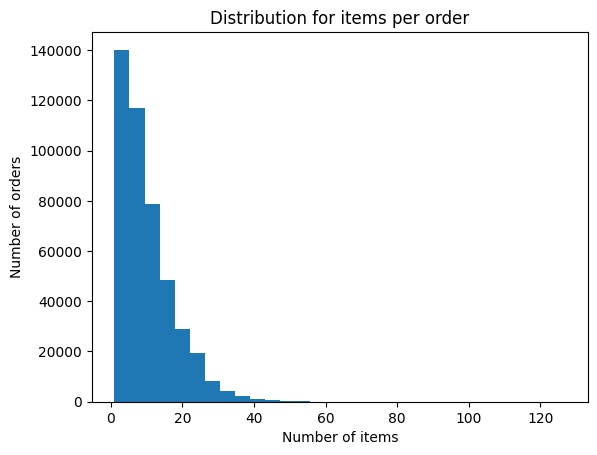

In [49]:
#Plot the graph represents distribution of items per order
plt.hist(items_per_order, bins=30)
plt.xlabel('Number of items')
plt.ylabel('Number of orders')                
plt.title('Distribution for items per order')
plt.show()

In [50]:
#Find the average value of items per order
average=items_per_order.mean().astype('int')
print(f"The average value of items per order is {average}")

The average value of items per order is 10


#From the above analysis the average items per order is 8. Most of the customers order one to 10 items per order. The number of customers who order more than 40 items in one order is very less.

### [C2] What are the top 20 items that are reordered most frequently (display their names and product IDs)?

#Our aim is to find the top 20 items which reordered most frequently. 

In [51]:
#Find the roordered items
reordered_items=order_products[order_products['reordered']==1]
#Filter the data by finding the product id of the item
reorder_merge=reordered_items.merge(products,on='product_id')


In [52]:
#Group the data and find size
reorder_counts=reorder_merge.groupby(['product_id','product_name']).size()

In [53]:
#Sort the data and print top 20 rows
top20_products=reorder_counts.sort_values(ascending=False)
print(top20_products.head(20))

product_id  product_name            
24852       banana                      55763
13176       bag of organic bananas      44450
21137       organic strawberries        28639
21903       organic baby spinach        26233
47209       organic hass avocado        23629
47766       organic avocado             18743
27845       organic whole milk          16251
47626       large lemon                 15044
27966       organic raspberries         14748
16797       strawberries                13945
26209       limes                       13327
22935       organic yellow onion        11145
24964       organic garlic              10411
45007       organic zucchini            10076
49683       cucumber kirby               9538
28204       organic fuji apple           8989
8277        apple honeycrisp organic     8836
39275       organic blueberries          8799
5876        organic lemon                8412
49235       organic half & half          8389
dtype: int64


#From the above result it is clear that most popular items are reordered frequently like bananas, strawberries, spinach, avacado etc.

### [C3] For each product, what proportion of its orders are reorders?

#Our aim is to find the proportion of total reorders to total orders of each product. For that filter the data and group the orders by product id and count the total orders. Then calculate the total number of reorders for each product. Then calculate the order proportion by finding the ratio of total reorders to total orders.

In [54]:
#Filter the data and find the average for each product
merge_orders=products.merge(order_products, on='product_id')
reorder_proportion=merge_orders.groupby(['product_id','product_name'])['reordered'].mean()

In [55]:
#Print the results
print(reorder_proportion.head(15))

product_id  product_name                                                     
1           chocolate sandwich cookies                                           0.564286
2           all-seasons salt                                                     0.000000
3           robust golden unsweetened oolong tea                                 0.738095
4           smart ones classic favorites mini rigatoni with vodka cream sauce    0.510204
7           pure coconut water with orange                                       0.500000
8           cut russet potatoes steam n' mash                                    0.315789
9           light strawberry blueberry yogurt                                    0.761905
10          sparkling orange juice & prickly pear beverage                       0.448071
11          peach mango juice                                                    0.625000
12          chocolate fudge layer cake                                           0.390244
13          saline nas

#The above table shows the reorder proportions. If the total reorder for an item is zero, the reorder proportion is zero.i.e, for eg, no customer reordered the item All season salt. All the orders for all seasons salt was its first order for different customers. 

### [C4] For each customer, what proportion of their products ordered are reorders?

#Our aim is to find the proportion of their products ordered are reorders for each customer. For that filter our data and group the data by each customer order by using their user id. Then count how many times each product ordered and also find the reorder count for each product. Then calculate the ratio of total reorders to total orders of each customer.

In [56]:
#Filter the data as per our problem
orders_merge =orders.merge(order_products, on='order_id')

In [57]:
#Find the average for each customer
reorder_proportion=orders_merge.groupby('user_id')['reordered'].mean()
reorder_proportion=reorder_proportion.reset_index(name='reorder_proportion')
#Print the results
print(reorder_proportion.head(15))


    user_id  reorder_proportion
0         2            0.038462
1         4            0.000000
2         5            0.666667
3         6            0.000000
4         7            0.928571
5        11            0.200000
6        12            0.250000
7        13            0.565217
8        14            0.360656
9        15            0.538462
10       16            0.531250
11       17            0.716981
12       19            0.291667
13       20            0.000000
14       21            0.400000


#The above table shows the reorder proportion of each customer.

### [C5] What are the top 20 items that people put in their carts first? 

#Our aim is to find the top 20 items that people put in their carts first.

In [58]:
#Find the first orders in the cart
top_products=order_products[order_products['add_to_cart_order']==1]
#Filter the data
cart_merge=top_products.merge(products, on='product_id')
#Group the data and sort the values
top_count=cart_merge.groupby(['product_id','product_name']).size().sort_values(ascending=False)
#Print top 20 results
print(top_count.head(20))

product_id  product_name               
24852       banana                         15562
13176       bag of organic bananas         11026
27845       organic whole milk              4363
21137       organic strawberries            3946
47209       organic hass avocado            3390
21903       organic baby spinach            3336
47766       organic avocado                 3044
19660       spring water                    2336
16797       strawberries                    2308
27966       organic raspberries             2024
44632       sparkling water grapefruit      1914
49235       organic half & half             1797
47626       large lemon                     1737
196         soda                            1733
38689       organic reduced fat milk        1397
26209       limes                           1370
12341       hass avocados                   1340
5785        organic reduced fat 2% milk     1310
27086       half & half                     1309
43352       raspberries      

#The above table shows the top 20 items that people put in their carts first. the most popular items like bananas, strawberries, avocado, spinach etc are put in the cart first. 

Conclusion:
    In the project we analyse the Instacart dataset to gain the insights  about shopping pattern of the customers using this app.We verified the values in columns of datasets and visulalized the shopping pattern by time and by day of the week. We also identify the most poular items in the order. The result shows that most of the customers prefer weekends than weekday for shopping and peak time for shopping is around 10.00am to 4.00 pm.Also we can see that most of the customers purchase are on weekly or monthly basis.